# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Cole Nollette

### GitHub: https://github.com/nollettecs/Module6_44620



Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

# Importing SpaCy

In [6]:
# Only need to run these once in the Jupyter notebook (to ensure packages are installed in the notebook environment)
%pip install spacy
%pip install spacytextblob

# Import the libraries for use
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 6.3 MB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 780 kB 30.7 MB/s eta 0:00:01
     |████████████████████████████████| 133 kB 18.9 MB/s eta 0:00:01
     |████████████████████████████████| 455 kB 20.4 MB/s eta 0:00:01
     |████████████████████████████████| 491 kB 40.0 MB/s eta 0:00:01
     |████████████████████████████████| 5.3 MB 29.5 MB/s eta 0:00:01
     |████████████████████████████████| 44 kB 9.3 MB/s  eta 0:00:01
     |████████████████████████████████| 182 kB 19.2 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 11.8 MB/s eta 0:00:01
     |████████████████████████████████| 129 kB 38.9 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 15.2 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 4.6 MB/s  eta 0:00:01
     |████████████████████████████████| 5.4 MB 47.7 MB/s eta 0:00:01
     |████████████████████████

In [15]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                   Version
------------------------- ---------------
annotated-types           0.7.0
anyio                     4.2.0
appnope                   0.1.3
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.14.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blis                      1.0.1
catalogue                 2.0.10
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
cloudpathlib              0.20.0
comm                      0.2.1
confection                0.1.5
contourpy                 1.2.0
cycler                    0.12.1
cymem                     2.0.8
debugpy                   1.8.0
decorator                 5.1.1
defusedxml                0.7.1
en_core_web_sm            3.8.0
executing       

# Question 1:

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [16]:
import requests
import pickle

# URL of the article
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# request to get the HTML content
response = requests.get(url)
html_content = response.text

# determine pkl file name
new_file = "NewArticle.pkl"

# Save HTML content to a pickle file
with open(new_file, "wb") as file:
    pickle.dump(html_content, file)

print(f"HTML content saved to {new_file}")

HTML content saved to NewArticle.pkl


In [ ]:
# Issues with Matplotlib
# Installed using magic commands
%pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.8 MB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 31.7 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 7.3 MB/s  eta 0:00:01
     |████████████████████████████████| 106 kB 18.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 23.2 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 39.8 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# Question 2:

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [18]:
import pickle
from bs4 import BeautifulSoup

# Load the HTML content from the pickle file
with open("NewArticle.pkl", "rb") as file:
    loaded_html = pickle.load(file)

# Use BeautifulSoup to parse the HTML content
soup = BeautifulSoup(loaded_html, "html.parser")

# Extract and print the text content of the article
article_text = soup.get_text()

# Print the first 500 characters of the extracted text
print(article_text[:500])  # Print a preview of the first 500 characters

















How Laser Headlights Work | Hackaday






































































Skip to content






Hackaday


Primary Menu

Home
Blog
Hackaday.io
Tindie
Hackaday Prize
Submit
About


Search for:



 March 27, 2021 






How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.


# Question 3:

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [20]:
# Issues with SpaCy
# Attemtping to install using magic commands
!python3 -m spacy download en_core_web_sm

/Users/nollettecs/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 12.8 MB 3.4 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [21]:
import pickle
import spacy
from collections import Counter

# Load the HTML content from the pickle file
with open("NewArticle.pkl", "rb") as file:
    loaded_html = pickle.load(file)

# Use BeautifulSoup to parse the HTML content and get text
from bs4 import BeautifulSoup
soup = BeautifulSoup(loaded_html, "html.parser")
article_text = soup.get_text()

# Load spaCy's language model (you can use 'en_core_web_sm')
nlp = spacy.load("en_core_web_sm")

# Process the text with spaCy
doc = nlp(article_text)

# Filter out unwanted tokens: punctuation, stopwords, and whitespace
filtered_tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

# Count the frequency of each token
token_counts = Counter(filtered_tokens)

# Get the 5 most common tokens
common_tokens = token_counts.most_common(5)

# Print the common tokens with their frequencies
print("Most frequent tokens (after filtering):")
for token, freq in common_tokens:
    print(f"Token: {token}, Frequency: {freq}")

Most frequent tokens (after filtering):
Token: comment, Frequency: 136
Token: march, Frequency: 133
Token: 2021, Frequency: 133
Token: says, Frequency: 132
Token: report, Frequency: 130


# Question 4:

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [22]:
import pickle
import spacy
from collections import Counter
from bs4 import BeautifulSoup

# Load the HTML content from the pickle file
with open("NewArticle.pkl", "rb") as file:
    loaded_html = pickle.load(file)

# Use BeautifulSoup to parse the HTML content and get text
soup = BeautifulSoup(loaded_html, "html.parser")
article_text = soup.get_text()

# Load spaCy's language model (you can use 'en_core_web_sm')
nlp = spacy.load("en_core_web_sm")

# Process the text with spaCy
doc = nlp(article_text)

# Filter out unwanted tokens: punctuation, stopwords, and whitespace
# Also use the lemma of each token for analysis
filtered_lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

# Count the frequency of each lemma
lemma_counts = Counter(filtered_lemmas)

# Get the 5 most common lemmas
common_lemmas = lemma_counts.most_common(5)

# Print the common lemmas with their frequencies
print("Most frequent lemmas (after filtering):")
for lemma, freq in common_lemmas:
    print(f"Lemma: {lemma}, Frequency: {freq}")

Most frequent lemmas (after filtering):
Lemma: comment, Frequency: 157
Lemma: say, Frequency: 134
Lemma: march, Frequency: 133
Lemma: 2021, Frequency: 133
Lemma: report, Frequency: 130


# Question 5:

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [23]:
import spacy

# Define scoring by token
def score_sentence_by_token(sentence, interesting_tokens):
    # Get tokens (words) from the sentence
    tokens = [token.text.lower() for token in sentence if not token.is_space and not token.is_punct]
    if len(tokens) == 0:
        return 0
    # Count how many interesting tokens are in the sentence
    interesting_count = sum(1 for token in tokens if token in interesting_tokens)
    return interesting_count / len(tokens)

# Define scoring by lemma
def score_sentence_by_lemma(sentence, interesting_lemmas):
    # Get lemmas (base form) from the sentence
    lemmas = [token.lemma_.lower() for token in sentence if not token.is_space and not token.is_punct]
    if len(lemmas) == 0:
        return 0
    # Count how many interesting lemmas are in the sentence
    interesting_count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    return interesting_count / len(lemmas)

# Load the article text and process it with spaCy
nlp = spacy.load("en_core_web_sm")
doc = nlp(article_text)

# Get the first sentence of the article
first_sentence = list(doc.sents)[0]

# Interesting tokens and lemmas (use the most frequent ones identified earlier)
interesting_tokens = ["comment", "2021", "march", "says", "report"]  # From Q3 
interesting_lemmas = ["comment", "2021", "march", "say", "report"]  # From Q4

# Calculate scores
token_score = score_sentence_by_token(first_sentence, interesting_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, interesting_lemmas)

# Print results
print(f"Token Score: {token_score}")
print(f"Lemma Score: {lemma_score}")

Token Score: 0.08620689655172414
Lemma Score: 0.10344827586206896


# Question 6:

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

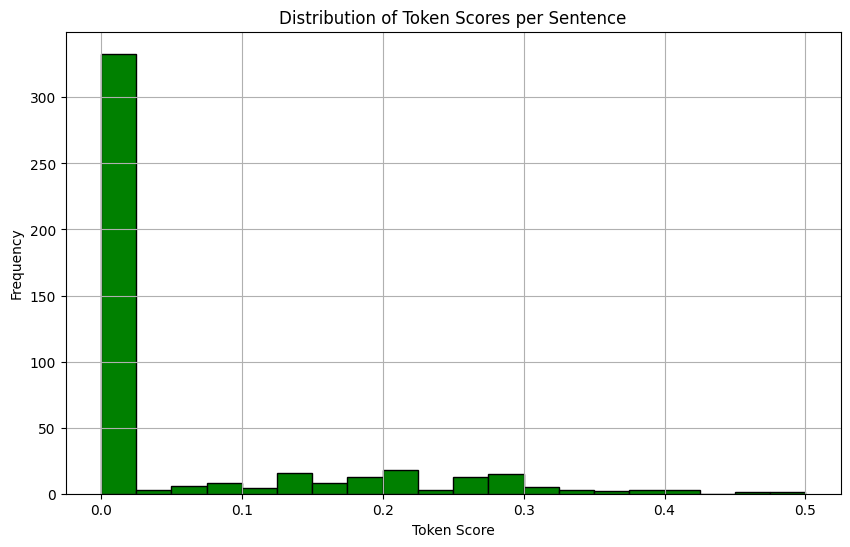

In [25]:
import spacy
import matplotlib.pyplot as plt

# Define scoring by token (same function from before)
def score_sentence_by_token(sentence, interesting_tokens):
    tokens = [token.text.lower() for token in sentence if not token.is_space and not token.is_punct]
    if len(tokens) == 0:
        return 0
    interesting_count = sum(1 for token in tokens if token in interesting_tokens)
    return interesting_count / len(tokens)

# Load the article text and process it with spaCy
nlp = spacy.load("en_core_web_sm")
doc = nlp(article_text)

# Interesting tokens (from your previous question, Q3)
interesting_tokens = ["comment", "2021", "march", "says", "report"]

# List to store token scores of each sentence
token_scores = []

# Iterate over each sentence in the document and calculate token scores
for sentence in doc.sents:
    score = score_sentence_by_token(sentence, interesting_tokens)
    token_scores.append(score)

# Plot the histogram of token scores
plt.figure(figsize=(10, 6))
plt.hist(token_scores, bins=20, edgecolor='black', color='green')
plt.title("Distribution of Token Scores per Sentence")
plt.xlabel("Token Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Question 7:

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

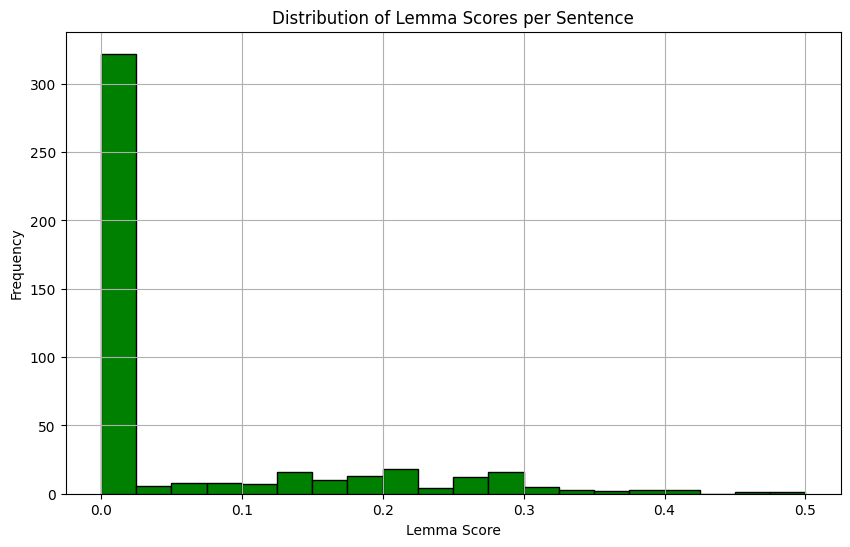

In [27]:
import spacy
import matplotlib.pyplot as plt

# Define scoring by lemma (same function from before)
def score_sentence_by_lemma(sentence, interesting_lemmas):
    lemmas = [token.lemma_.lower() for token in sentence if not token.is_space and not token.is_punct]
    if len(lemmas) == 0:
        return 0
    interesting_count = sum(1 for lemma in lemmas if lemma in interesting_lemmas)
    return interesting_count / len(lemmas)

# Load the article text and process it with spaCy
nlp = spacy.load("en_core_web_sm")
doc = nlp(article_text)

# Interesting lemmas (from your previous question, Q4)
interesting_lemmas = ["comment", "2021", "march", "say", "report"]

# List to store lemma scores of each sentence
lemma_scores = []

# Iterate over each sentence in the document and calculate lemma scores
for sentence in doc.sents:
    score = score_sentence_by_lemma(sentence, interesting_lemmas)
    lemma_scores.append(score)

# Plot the histogram of lemma scores
plt.figure(figsize=(10, 6))
plt.hist(lemma_scores, bins=20, edgecolor='black', color='green')
plt.title("Distribution of Lemma Scores per Sentence")
plt.xlabel("Lemma Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# In the histogram, the most common range of scores typically falls between 0.05 and 0.15


# Qustion 8:

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).